# Analysis of Income and Employment Patterns in Canada 

# Income and Employment Patterns in Canada

## Dataset: Income-Survey-Dataset.csv

### Objective

This project explores the socioeconomic landscape of Canadian individuals by analyzing income distribution, employment types, and demographic factors. The analysis aims to uncover income disparities across gender, education, immigration status, and provincial borders, offering data-driven insights into Canada's labor market.

## 📌 Table of Contents

1. [Project Overview](#project-overview)
2. [Libraries and Setup](#libraries-and-setup)
3. [Data Loading and Exploration](#data-loading-and-exploration)
4. [Research Questions and Analysis](#research-questions-and-analysis)
5. [Conclusion](#conclusion)

## 🔎 Project Overview

We analyze a Canadian income survey dataset using Python to answer 13 specific research questions. Key metrics include total income, employment type, education level, province, gender, family size, and immigration status. Visualization tools and statistical methods are applied to discover patterns and insights.


# Research Questions 
1. What is the average and median total income across all individuals?
2. How does total income vary by province? Provide summary statistics and a bar chart.
3. What is the distribution of income after tax compared to income before tax?
4. Which income sources (e.g., salary, pension, investment) contribute the most to total income on average?
5. What is the gender gap in total income? Visualize the difference.
6. How does highest level of education correlate with total income?
7. What is the average number of hours worked per week by province and how does it relate to income?
8. Do immigrants earn significantly more or less than non-immigrants?
9. What proportion of individuals rely on self-employment income as a major source?
10. Which provinces have the highest and lowest employment insurance claims relative to earnings?
11. Is there any correlation between age group (Age_gap) and pension received?
12. How does family size (Family_mem) affect total income or reliance on child benefits?
13. What percentage of people earn below the median income in each province? 

##  Libraries and Setup

Libraries used:  
- `pandas` for data manipulation  
- `matplotlib` and `seaborn` for visualizations  
- `scipy.stats` for statistical tests  
- `ydata_profiling` for automated profiling

In [2]:
# Load Libraries

import csv
import pandas as pd
import numpy as np
import time
import datetime
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr
from ydata_profiling import ProfileReport
from scipy.stats import spearmanr

C:\Users\hp\anaconda3\envs\py311_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 📂 Data Loading and Exploration


In [3]:
###  Load the Dataset

df = pd.read_csv('C:\\Users\\hp\\Downloads\\Datasets\\Income-Survey-Dataset.csv')
df

,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,...,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,1,139.6500,59,38,15,2,3,1,3,2,...,0,0,20275,0,0,0,1,1,99999996,99999996
1,2,254.1041,35,17,9,1,1,1,2,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
2,3,254.1041,35,17,9,2,1,1,3,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
3,4,254.1041,35,17,4,1,4,2,1,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
4,5,254.1041,35,17,3,1,96,6,6,6,...,0,0,110875,0,106000,0,4,4,99999996,99999996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72638,72639,1603.9917,35,23,5,1,4,1,2,1,...,0,23000,61825,0,28400,0,3,4,99999996,1800
72639,72640,162.6815,24,13,12,2,1,1,3,1,...,103000,0,132400,0,27350,0,3,4,99999996,99999996
72640,72641,162.6815,24,13,13,1,1,1,3,2,...,103000,0,132400,0,27350,0,3,4,99999996,99999996
72641,72642,162.6815,24,13,5,1,4,1,2,2,...,103000,0,132400,0,27350,0,3,4,99999996,99999996


# Summary Statistics

In [4]:
df.describe()

,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,...,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
count,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.00000,72643.000000,72643.000000,72643.000000,72643.000000,...,72643.000000,72643.000000,7.264300e+04,72643.000000,7.264300e+04,72643.000000,72643.000000,72643.000000,7.264300e+04,7.264300e+04
mean,36322.000000,507.016134,34.771458,20.433242,9.038201,1.51113,21.930881,2.311537,3.525199,2.167284,...,7665.033107,3901.038641,1.111956e+05,1747.700742,7.777053e+04,427.945914,2.797668,3.542255,9.624879e+07,7.790450e+07
std,20970.372139,622.308449,14.634608,10.755268,4.499854,0.49988,38.486236,2.259477,1.860497,1.826628,...,19847.702036,19728.923744,8.363631e+04,4964.163767,8.109349e+04,3126.157688,1.389884,1.564237,1.900139e+07,4.148903e+07
min,1.000000,10.856700,10.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,0.000000,-125000.000000,-9.565000e+04,0.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,18161.500000,151.937850,24.000000,13.000000,5.000000,1.00000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,5.568750e+04,0.000000,6.500000e+03,0.000000,2.000000,3.000000,1.000000e+08,1.000000e+08
50%,36322.000000,283.111000,35.000000,19.000000,10.000000,2.00000,3.000000,1.000000,3.000000,1.000000,...,0.000000,0.000000,9.337500e+04,0.000000,6.250000e+04,0.000000,2.000000,4.000000,1.000000e+08,1.000000e+08
75%,54482.500000,605.346400,47.000000,28.000000,13.000000,2.00000,4.000000,2.000000,4.000000,2.000000,...,0.000000,0.000000,1.452000e+05,0.000000,1.200000e+05,0.000000,4.000000,4.000000,1.000000e+08,1.000000e+08
max,72643.000000,8863.955800,59.000000,40.000000,15.000000,2.00000,99.000000,9.000000,9.000000,6.000000,...,369000.000000,400000.000000,2.095000e+06,70000.000000,1.216500e+06,67500.000000,7.000000,9.000000,1.000000e+08,1.000000e+08


#  Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72643 entries, 0 to 72642
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PersonID           72643 non-null  int64  
 1   Weight             72643 non-null  float64
 2   Province           72643 non-null  int64  
 3   MBMREGP            72643 non-null  int64  
 4   Age_gap            72643 non-null  int64  
 5   Gender             72643 non-null  int64  
 6   Marital_status     72643 non-null  int64  
 7   Highschool         72643 non-null  int64  
 8   Highest_edu        72643 non-null  int64  
 9   Work_ref           72643 non-null  int64  
 10  Work_yearly        72643 non-null  int64  
 11  Emp_week_ref       72643 non-null  int64  
 12  Total_hour_ref     72643 non-null  int64  
 13  paid_emp_ref       72643 non-null  int64  
 14  self_emp_ref       72643 non-null  int64  
 15  Immigrant          72643 non-null  int64  
 16  Year_immigrant     726

#  Preview Hidden Key Columns

In [6]:
df.loc[:,'Work_ref':'Pension']

,Work_ref,Work_yearly,Emp_week_ref,Total_hour_ref,paid_emp_ref,self_emp_ref,Immigrant,Year_immigrant,income_after_tax,Cap_gain,Childcare_expe,Child_benefit,CPP_QPP,Earning,Guaranteed_income,Investment,Old_age_pension,Private_pension,Self_emp_income,Pension
0,2,30,96,9996,6,6,2,6,20275,0,0,0,5000,0,7750,0,7000,0,0,0
1,1,11,52,2080,1,2,2,6,61680,0,0,0,0,70000,0,0,0,0,0,0
2,1,11,52,2080,1,2,2,6,26875,0,0,4500,0,22000,0,0,0,0,0,0
3,1,11,52,2080,1,2,2,6,14000,0,0,0,0,14000,0,0,0,0,0,0
4,6,96,96,9996,6,6,6,6,99999996,99999996,99999996,99999996,99999996,99999996,99999996,99999996,99999996,99999996,99999996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72638,1,22,20,240,1,2,1,1,4625,0,0,0,0,4400,0,0,0,0,0,0
72639,1,21,15,525,1,2,2,6,27940,25,0,0,0,27000,0,0,0,18500,0,103000
72640,2,30,0,9996,6,6,2,6,63830,0,0,0,0,350,0,0,0,84500,0,103000
72641,2,30,0,9996,6,6,2,6,850,0,0,0,0,0,0,0,0,0,0,103000


# Investigate Self-Employment Columns

In [7]:
df[['Self_emp_income', 'Self_emp_income.1']].describe()

,Self_emp_income,Self_emp_income.1
count,7.264300e+04,72643.000000
mean,1.766036e+07,3901.038641
std,3.813172e+07,19728.923744
min,-1.250000e+05,-125000.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,0.000000e+00,0.000000
max,1.000000e+08,400000.000000


# Summary of Total Income

In [8]:
df['Total_income'].describe()

count    7.264300e+04
mean     1.111956e+05
std      8.363631e+04
min     -9.565000e+04
25%      5.568750e+04
50%      9.337500e+04
75%      1.452000e+05
max      2.095000e+06
Name: Total_income, dtype: float64

In [9]:
# Convert key categorical columns to string for better readability
df["Province"] = df["Province"].astype(str)
df["Gender"] = df["Gender"].astype(str)
df["Highest_edu"] = df["Highest_edu"].astype(str)
df["Immigrant"] = df["Immigrant"].astype(str)

#  Research Questions and Analysis
We now explore the 13 research questions using data and visualizations.

### 1. What is the average and median total income?

In [10]:
print(" Average Total Income:", df['Total_income'].mean())
print(" Median Total Income:", df['Total_income'].median())

 Average Total Income: 111195.60522004873
 Median Total Income: 93375.0


>  **Insight:** The difference between average and median reveals potential income disparity, with high earners possibly inflating the average.

### 2. How does total income vary by province?

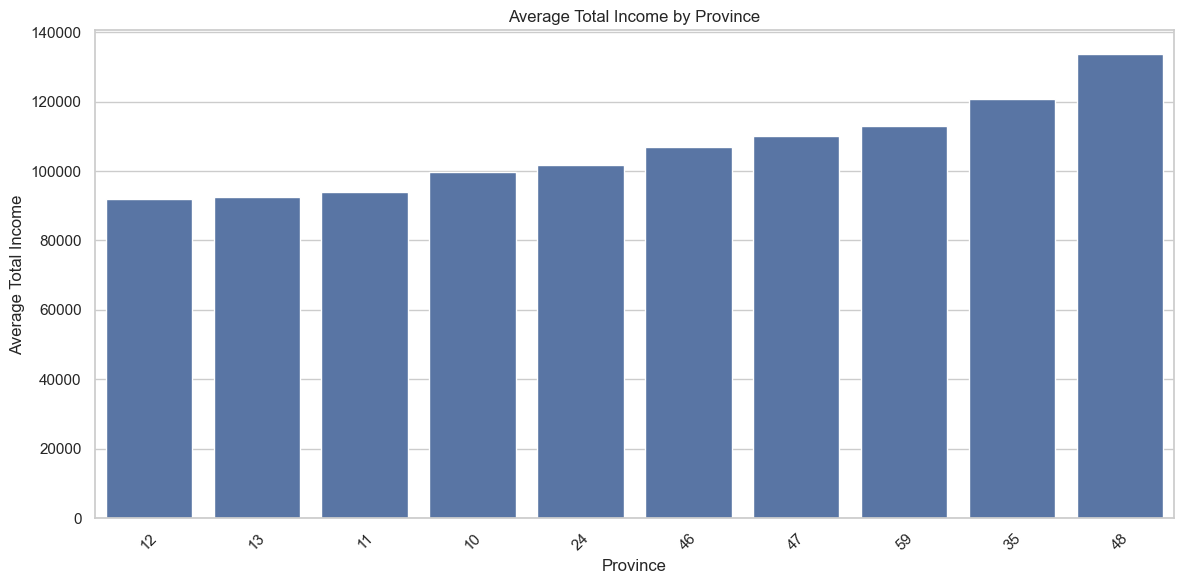

,count,mean,std,min,25%,50%,75%,max
Province,,,,,,,,
10,2433.0,99735.943280,75601.137171,425.0,43750.0,79600.0,133850.0,559250.0
11,1961.0,93999.031107,59227.816353,-18550.0,49575.0,83950.0,125800.0,414675.0
12,3879.0,91989.958752,61897.528734,475.0,47425.0,79375.0,121700.0,397500.0
13,3750.0,92606.793333,61311.288434,550.0,48225.0,79325.0,120000.0,425075.0
24,13862.0,101624.172197,77099.426890,-21050.0,50200.0,85575.0,132600.0,912700.0
35,20415.0,120637.507960,91349.670581,-44750.0,60575.0,101975.0,157350.0,1264350.0
46,5825.0,106849.429185,74931.236025,-58100.0,56025.0,90100.0,139675.0,734175.0
47,5149.0,110062.424743,72718.920858,-95650.0,56925.0,95600.0,149600.0,585500.0
48,7203.0,133821.449396,100650.652534,325.0,67200.0,111325.0,172500.0,970900.0


In [11]:
#Summary statistics and bar chart
income_by_province = df.groupby("Province")["Total_income"].describe()

# Mean income per province for bar plot
mean_income_by_province = df.groupby("Province")["Total_income"].mean().sort_values()

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_income_by_province.index, y=mean_income_by_province.values)
plt.title("Average Total Income by Province")
plt.xlabel("Province")
plt.ylabel("Average Total Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

income_by_province

💡 **Insight:**  
> The summary statistics show significant variation in average total income across provinces. For instance, Province 59 has the highest mean income at > $112,899, while Province 11 has the lowest at $93,999.  


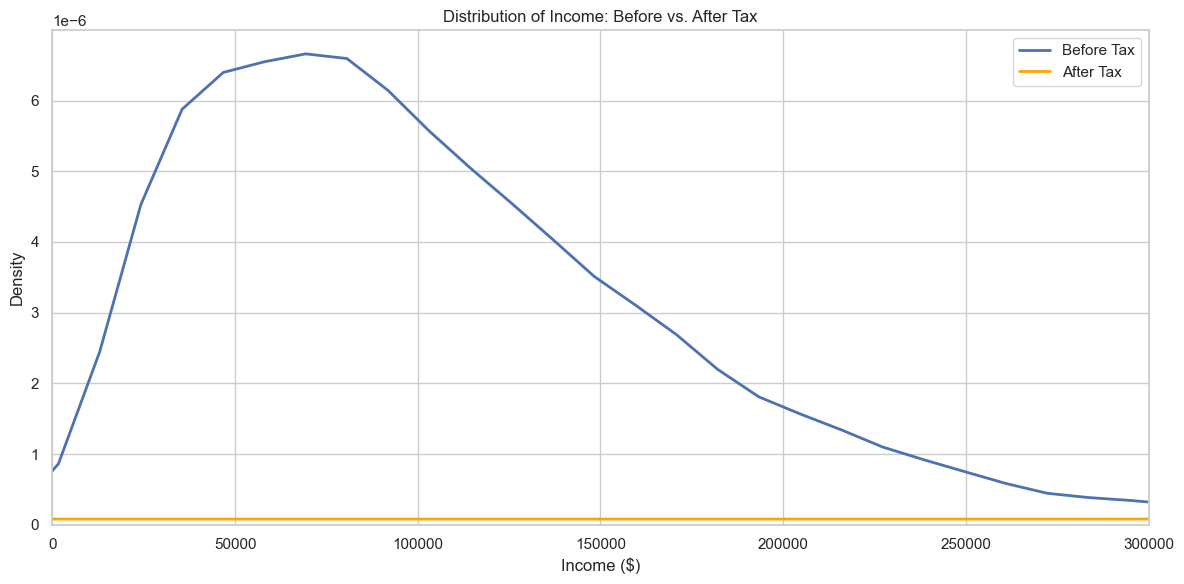

,Total_income,income_after_tax
count,7.264300e+04,7.264300e+04
mean,1.111956e+05,1.769371e+07
std,8.363631e+04,3.811629e+07
min,-9.565000e+04,-1.394500e+05
25%,5.568750e+04,2.277500e+04
50%,9.337500e+04,4.333000e+04
75%,1.452000e+05,8.366000e+04
max,2.095000e+06,1.000000e+08
median,9.337500e+04,4.333000e+04


In [12]:
# 3. Distribution of income before vs. after tax
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="Total_income", label="Before Tax", linewidth=2)
sns.kdeplot(data=df, x="income_after_tax", label="After Tax", linewidth=2, color='orange')
plt.title("Distribution of Income: Before vs. After Tax")
plt.xlabel("Income ($)")
plt.ylabel("Density")
plt.xlim(0, 300000)  # Crop extreme values for better visibility
plt.legend()
plt.tight_layout()
plt.show()

# Summary comparison
income_comparison = df[["Total_income", "income_after_tax"]].describe()
income_comparison.loc["median"] = df[["Total_income", "income_after_tax"]].median()
income_comparison


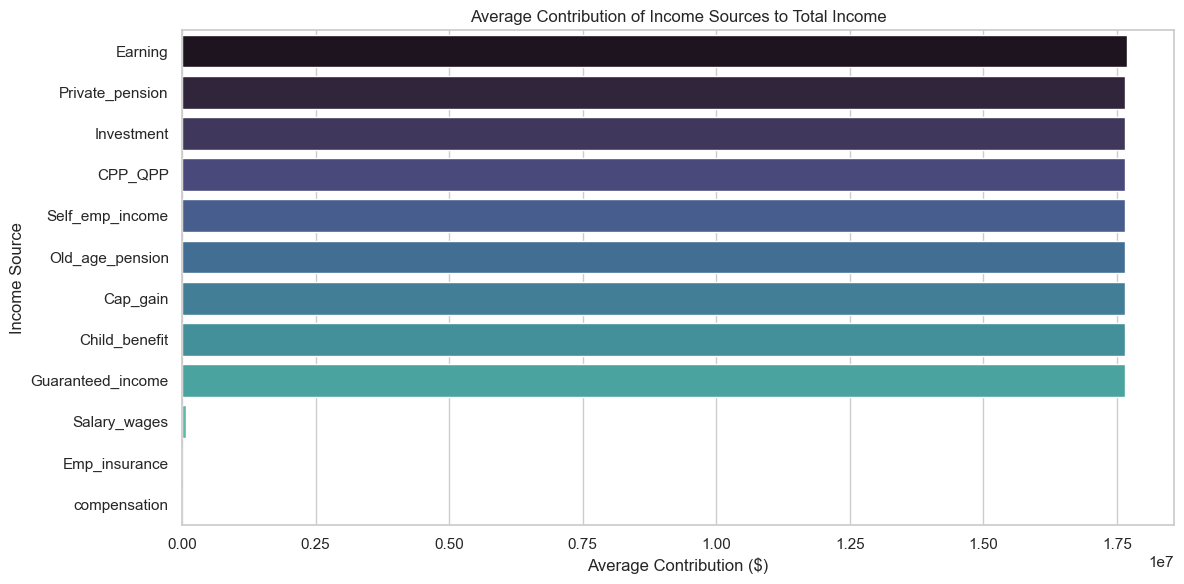

Earning              1.768738e+07
Private_pension      1.766300e+07
Investment           1.766130e+07
CPP_QPP              1.766098e+07
Self_emp_income      1.766036e+07
Old_age_pension      1.766033e+07
Cap_gain             1.765962e+07
Child_benefit        1.765954e+07
Guaranteed_income    1.765928e+07
Salary_wages         7.777053e+04
Emp_insurance        1.747701e+03
compensation         4.279459e+02
dtype: float64

In [13]:
# 4. Income source contributions to total income on Average

income_sources = [
    "Salary_wages", "Private_pension", "Old_age_pension", "CPP_QPP",
    "Investment", "Self_emp_income", "Earning", "Guaranteed_income",
    "Child_benefit", "Emp_insurance", "Cap_gain", "compensation"
]

# Compute average contribution of each income source
average_contributions = df[income_sources].mean().sort_values(ascending=False)

# Plot average income source contribution
plt.figure(figsize=(12, 6))
sns.barplot(
    x=average_contributions.values, 
    y=average_contributions.index, 
    hue=average_contributions.index,
    palette="mako",
    dodge=False,
    legend=False
)
plt.title("Average Contribution of Income Sources to Total Income")
plt.xlabel("Average Contribution ($)")
plt.ylabel("Income Source")
plt.tight_layout()
plt.show()

average_contributions


  Gender_label           mean   median  count
0       Female  108863.294506  90600.0  37130
1         Male  113634.112156  96175.0  35513


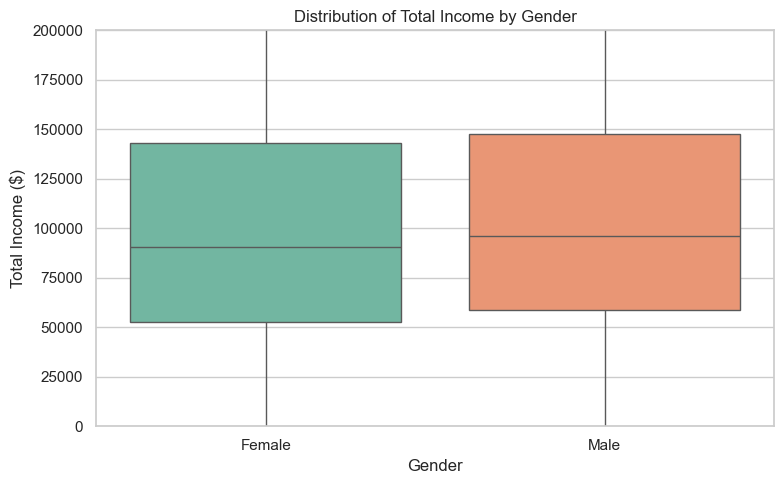

In [14]:
# 5.Gender gap in total income

# Replace gender codes with labels
gender_map = {"1": "Male", "2": "Female"}
df["Gender_label"] = df["Gender"].map(gender_map)

# Calculate average and median income by gender
gender_stats = df.groupby("Gender_label")["Total_income"].agg(['mean', 'median', 'count']).reset_index()

print(gender_stats)

# Box plot to show income distribution by gender
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="Gender_label",
    y="Total_income",
    hue="Gender_label",         # solves the palette warning
    palette="Set2",             # now works properly
    dodge=False                 # avoids side-by-side boxes
)

plt.ylim(0, 200000)  # Adjust to reduce outlier skew
plt.title("Distribution of Total Income by Gender")
plt.ylabel("Total Income ($)")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()



Average Income by Education:
 Highest_edu
1     78467.200549
9     85359.422404
2    101792.861585
3    105977.500793
6    123513.936311
4    138170.929444
Name: Total_income, dtype: float64


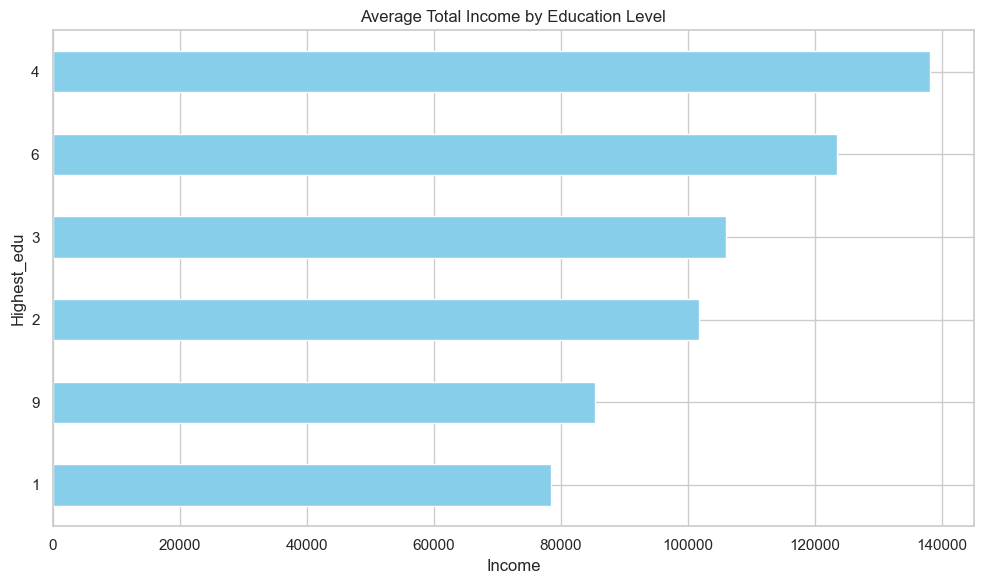

In [15]:
# 6. Correlation education with total income

edu_income = df.groupby("Highest_edu")["Total_income"].mean().sort_values()
print("Average Income by Education:\n", edu_income)

plt.figure(figsize=(10,6))
edu_income.plot(kind="barh", color="skyblue")
plt.title("Average Total Income by Education Level")
plt.xlabel("Income")
plt.tight_layout()
plt.show()

Avg Hours & Income by Province:
           Total_hour_ref   Total_income
Province                               
10           5967.655158   99735.943280
11           5312.799082   93999.031107
12           5556.732405   91989.958752
13           5783.343733   92606.793333
24           5552.453037  101624.172197
35           5585.919177  120637.507960
46           5389.493734  106849.429185
47           5294.349194  110062.424743
48           5431.101902  133821.449396
59           5379.806515  112899.084619


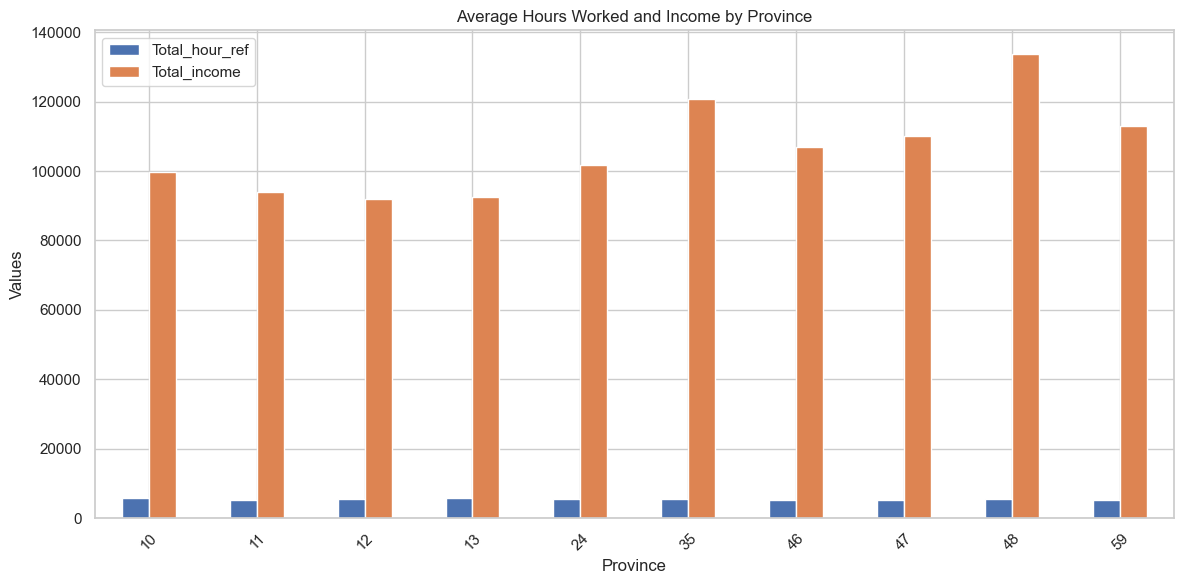

In [16]:
# 7. Average number of hours worked per week by province and how does it relate to income

province_hours_income = df.groupby("Province")[["Total_hour_ref", "Total_income"]].mean()
print("Avg Hours & Income by Province:\n", province_hours_income)

province_hours_income.plot(kind="bar", figsize=(12,6))
plt.title("Average Hours Worked and Income by Province")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# 8. Immigrants vs non-immigrants
immigrant_income = df.groupby("Immigrant")["Total_income"].mean()
print("Avg Income by Immigrant Status:\n", immigrant_income)

t_stat, p_val = ttest_ind(
    df[df["Immigrant"] == "1"]["Total_income"].dropna(),
    df[df["Immigrant"] == "2"]["Total_income"].dropna()
)
print(f"T-test p-value (Immigrant vs Non): {p_val:.4f}")



Avg Income by Immigrant Status:
 Immigrant
1    107563.487901
2    106715.328645
6    123513.936311
9    137987.138948
Name: Total_income, dtype: float64
T-test p-value (Immigrant vs Non): 0.3859


In [18]:
# 9. Reliance on self-employment
df["Self_emp_ratio"] = df["Self_emp_income"] / df["Total_income"]
reliant_pct = (df["Self_emp_ratio"] > 0.5).mean() * 100
print(f"Percentage relying on self-employment income (>50% of total): {reliant_pct:.2f}%")


Percentage relying on self-employment income (>50% of total): 18.79%


Avg EI/Earnings by Province:
 Province
10    1.363877
11    1.310032
13    0.754126
12    0.434202
47    0.291289
35    0.273290
59    0.247158
24    0.201764
48    0.135043
46    0.087593
Name: EI_ratio, dtype: float64


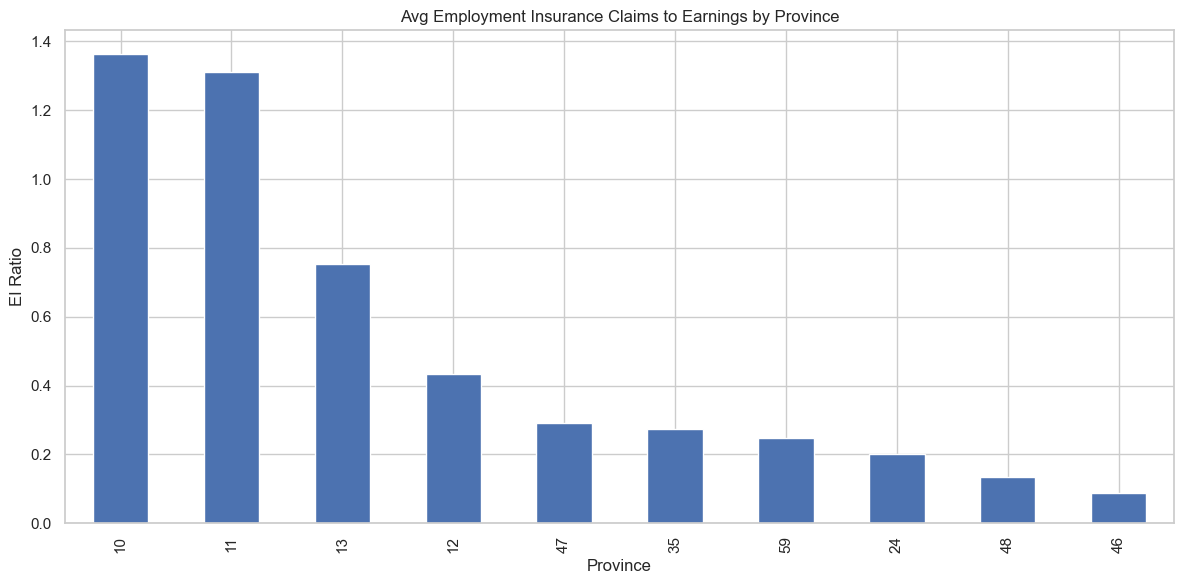

In [19]:
# 10. Provinces that have the highest and lowest employment insurance claims relative to earnings

df = df[(df["Earning"].notna()) & (df["Earning"] != 0)].copy()

# safely convert columns
df.loc[:, "Emp_insurance"] = pd.to_numeric(df["Emp_insurance"], errors='coerce')
df.loc[:, "Earning"] = pd.to_numeric(df["Earning"], errors='coerce')

# Create new column
df.loc[:, "EI_ratio"] = df["Emp_insurance"] / df["Earning"]

# Group and analyze
ei_ratio = df.groupby("Province")["EI_ratio"].mean().sort_values(ascending=False)
print("Avg EI/Earnings by Province:\n", ei_ratio)

# Plot
ei_ratio.plot(kind="bar", figsize=(12,6), title="Avg Employment Insurance Claims to Earnings by Province")
plt.ylabel("EI Ratio")
plt.tight_layout()
plt.show()

In [20]:
# 11. Age group vs pension

# Drop rows where Age_gap or Pension is missing
df_corr = df[["Age_gap", "Pension"]].dropna()

# Calculate Spearman correlation
corr_age_pension, p_value = spearmanr(df_corr["Age_gap"], df_corr["Pension"])

print(f"Spearman Correlation between Age Group and Pension: {corr_age_pension:.4f}")
print(f"P-value: {p_value:.4f}")


Spearman Correlation between Age Group and Pension: 0.4134
P-value: 0.0000


Family Size Impact on Income and Benefits:
              Total_income  Child_benefit
Family_mem                              
1            64380.119870   5.417890e+05
2           112994.126908   4.917526e+06
3           130505.939872   2.438288e+07
4           152899.962933   3.896592e+07
5           146923.259494   5.076430e+07
6           135130.426248   6.029304e+07
7           124141.765579   6.691532e+07


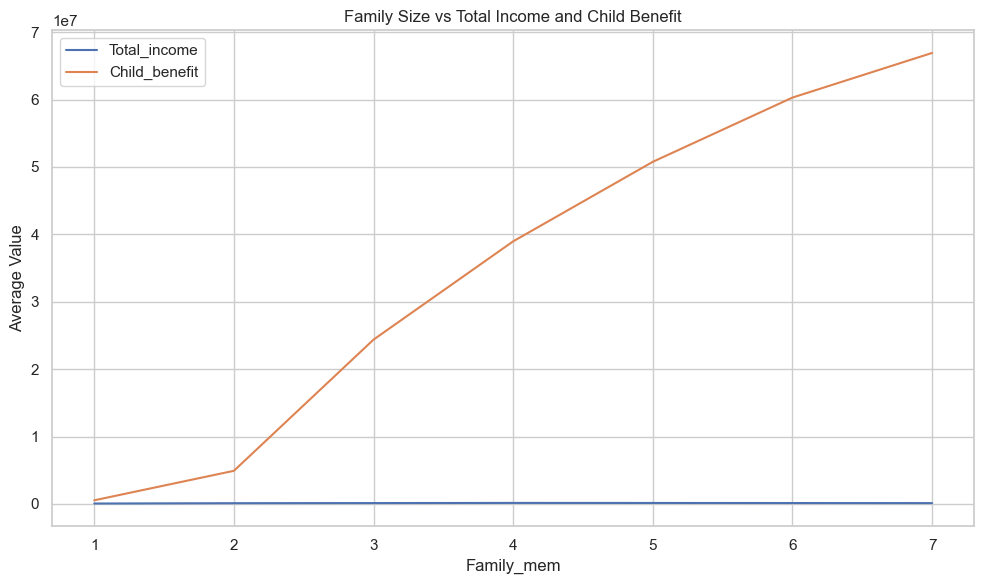

In [21]:
# 12. Family size vs income and child benefit
family_stats = df.groupby("Family_mem")[["Total_income", "Child_benefit"]].mean()
print("Family Size Impact on Income and Benefits:\n", family_stats)

family_stats.plot(figsize=(10,6), title="Family Size vs Total Income and Child Benefit")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()


Percentage of People Below Median Income (by Province):
 Province
10    49.847282
11    49.966689
12    49.745269
13    49.961210
24    49.980725
35    49.973788
46    49.955830
47    50.000000
48    49.973918
59    49.968224
Name: Below_median, dtype: float64


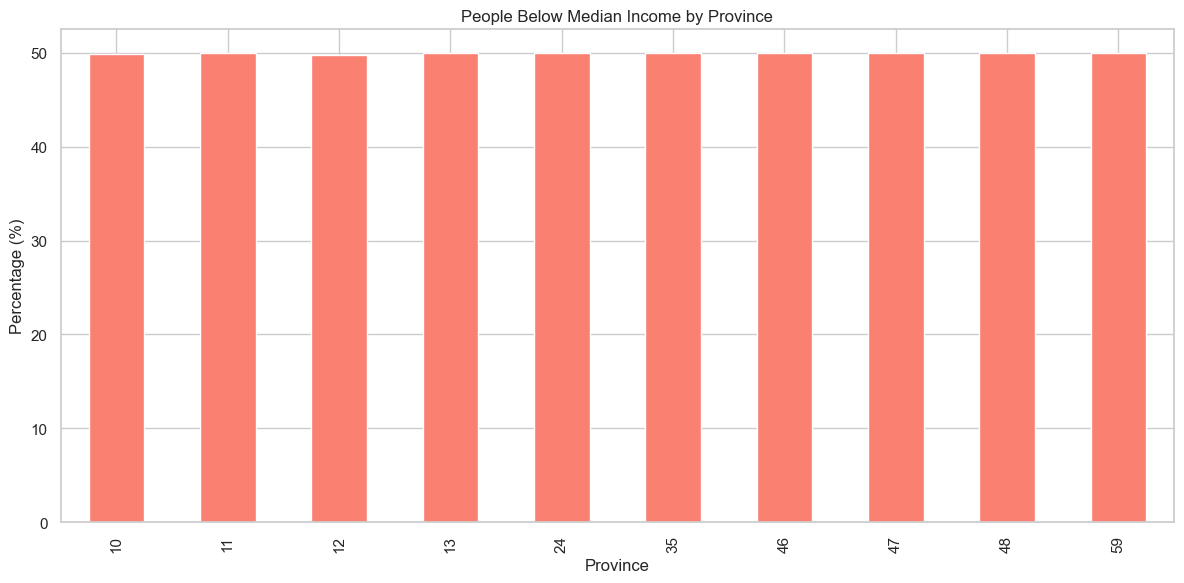

In [22]:
# 13. % earning below median in each province
province_median = df.groupby("Province")["Total_income"].median()

df["Below_median"] = df.apply(
    lambda row: 1 if row["Total_income"] < province_median[row["Province"]] else 0,
    axis=1
)

below_med = df.groupby("Province")["Below_median"].mean() * 100
print("Percentage of People Below Median Income (by Province):\n", below_med)

# Plotting
below_med.plot(kind="bar", figsize=(12, 6), title="People Below Median Income by Province", color="salmon")
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.show()